In [1]:
import artm
import glob
import os
import artm
import glob #module gives an opp to search for a file with a particular regex
import os

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn

In [3]:
def get_batch_vectorizer(target_batches_folder, data_path):
    if not glob.glob(os.path.join(target_batches_folder, "*")):
        return artm.BatchVectorizer(data_path=data_path,
                                                data_format='vowpal_wabbit',
                                                collection_name=data_path + '_collection',
                                                target_folder=target_batches_folder)
    else:
        return artm.BatchVectorizer(data_path=target_batches_folder,
                                                data_format='batches')


In [4]:
def get_dict(target_batches_folder):
    dict_name = os.path.join(target_batches_folder, "dict.txt")
    dictionary = artm.Dictionary(name="dictionary")
    if not os.path.exists(dict_name):
        dictionary.gather(target_batches_folder)
        dictionary.save_text(dict_name)
    else:
        dictionary.load_text(dict_name)
    return dictionary


In [5]:
def print_top_words(model, tracker_name="top_tokens"):
    for topic_name in model.topic_names:
        print(topic_name + ': ')
        if topic_named in last_tokens:
            for word in model.score_tracker[tracker_name].last_tokens[topic_name]:
                print (word)
        else:
            print("free topic")
        print()


In [6]:

def generate_topic_names(topic_count, background_topic_count):

    background_topics, objective_topics, all_topics = [], [], []
    for i in range(topic_count):
        topic_name = ("background_topic_" + str(i)) if i < background_topic_count \
            else ("objective_topic_" + str(i - background_topic_count))
        all_topics.append(topic_name)
        if i < background_topic_count:
            background_topics.append(topic_name)
        else:
            objective_topics.append(topic_name)
    return all_topics, objective_topics, background_topics


In [7]:
def set_regularizers(model, devided, topic_names,  **regs):
    all_topics, objective_topics, background_topics = topic_names
    if devided:
            if 'objective_sparse_phi' in regs:
                    model.regularizers.add(
                        artm.SmoothSparsePhiRegularizer(
                            name='objective_sparse_phi',
                            topic_names=objective_topics,
                            tau=regs['objective_sparse_phi']),
                        overwrite= True)
            if 'objective_sparse_theta' in regs:
                    model.regularizers.add(
                        artm.SmoothSparseThetaRegularizer(
                            name='objective_sparse_theta',
                            topic_names=objective_topics,
                            tau=regs['objective_sparse_theta']),
                        overwrite= True)
            if 'background_sparse_phi' in regs:
                    model.regularizers.add(
                        artm.SmoothSparsePhiRegularizer(
                            name='background_sparse_phi',
                            topic_names=background_topics,
                            tau=regs['background_sparse_phi']),
                        overwrite= True)
            if 'background_sparse_theta' in regs:
                    model.regularizers.add(
                        artm.SmoothSparseThetaRegularizer(
                            name='background_sparse_theta',
                            topic_names=background_topics,
                            tau=regs['background_sparse_theta']),
                        overwrite=True)
    else:
        if 'sparse_phi' in regs:
                    model.regularizers.add(
                        artm.SmoothSparsePhiRegularizer(
                            name='sparse_phi',
                            tau=regs['sparse_phi']),
                        overwrite=True)
        if 'sparse_theta' in regs:
                    model.regularizers.add(
                        artm.SmoothSparseThetaRegularizer(
                            name='sparse_theta',
                            tau=regs['sparse_theta']),
                        overwrite=True)
    if  'decorrelator_phi' in regs:
            if devided:
                model.regularizers.add(
                            artm.DecorrelatorPhiRegularizer(
                                name='decorrelator_phi',
                                topic_names=objective_topics,
                                tau=regs['decorrelator_phi']),
                            overwrite=True)
            else:
                model.regularizers.add(
                            artm.DecorrelatorPhiRegularizer(
                                name='decorrelator_phi',
                                tau=regs['decorrelator_phi']),
                            overwrite=True)



In [8]:
def set_scores(model, topic_names, devided=True,  **scores):
    #if not ('perplexity_score' in [score.name for
    #                               score in model.scores]):
    #    model.scores.add(PerplexityScore(name='perplexity_score'))
    all_topics, objective_topics ,background_topics = topic_names
    if 'top_tokens' in scores:
        model.scores.add(artm.TopTokensScore(
            name='top_tokens',
            num_tokens=scores['top_tokens']),
            overwrite= True)
    if 'top_tokens_extended' in scores:
        model.scores.add(artm.TopTokensScore(
            name='top_tokens_extended',
            num_tokens=scores['top_tokens_extended']),
            overwrite= True)

    if devided:
            if 'objective_sparsity_phi' in scores:
                    model.scores.add(
                        artm.SparsityPhiScore(
                            name='objective_sparsity_phi',
                            topic_names=objective_topics),
                        overwrite= True)
            if 'objective_sparsity_theta' in scores:
                    model.scores.add(
                        artm.SparsityThetaScore(
                            name='objective_sparsity_theta',
                            topic_names=objective_topics),
                        overwrite= True)
            if 'background_sparsity_phi' in scores:
                    model.scores.add(
                        artm.SparsityPhiScore(
                            name='background_sparsity_phi',
                            topic_names=background_topics),
                        overwrite= True)
            if 'background_sparsityity_theta' in scores:
                    model.scores.add(
                        artm.SparsityThetaScore(
                            name='background_sparsity_theta',
                            topic_names=background_topics),
                        overwrite=True)
    else:
        if 'sparsity_phi' in scores:
                    print ('if sparsity_phi in scores:')
                    model.scores.add(
                        artm.SparsityPhiScore(
                            name='sparsity_phi'),
                        overwrite=True)
        if 'sparsity_theta' in scores:
                    print ('sparsity_theta  in scores')
                    model.scores.add(
                        artm.SparsityThetaScore(
                            name='sparsity_theta'),
                        overwrite=True)



In [9]:

def get_scores(topic_names):
    # background_topics = (background_topics if background_topics else topics_amount//10)

    all_topics, objective_topics, background_topics = topic_names
    print("get_scores", all_topics)
    print("get scores : " , background_topics)
    print ("get_scores : " , objective_topics)

    scores_list=[]
    scores_list.append(artm.PerplexityScore(name='objective_perplexity_score',
                                            topic_names=objective_topics))
    scores_list.append(artm.SparsityPhiScore(name='objective_sparsity_phi',
                                             topic_names=objective_topics))
    scores_list.append(artm.SparsityThetaScore(name='objective_sparsity_theta',
                                               topic_names=objective_topics))

    scores_list.append(artm.PerplexityScore(name='perplexity_score',
                                            topic_names=all_topics))

    scores_list.append(artm.SparsityThetaScore(name='background_sparsity_theta',
                                               topic_names=background_topics))
    scores_list.append(artm.SparsityPhiScore(name='background_sparsity_phi',
                                               topic_names=background_topics))
    scores_list.append(artm.TopTokensScore(name="top_words",
                                              num_tokens=10, topic_names=objective_topics))
    return scores_list



## Get Batch vectorizer

In [10]:
batch_vectorizer = get_batch_vectorizer("wiki_batches", "vw.wiki-enru.txt")

In [11]:
dictionary=get_dict("wiki_batches")

In [12]:
T = 24
topic_names = generate_topic_names(T, 0)
all_topics, objective_topics, background_topics = topic_names

In [13]:
devided_model = artm.ARTM(num_topics=T,
                          topic_names = topic_names[0],
                          cache_theta=True,
                          reuse_theta=True,
                          theta_columns_naming="title",
                          seed=4242,
                          num_document_passes=3,
                          num_processors = 10,
                          class_ids = {"@russian" :1, "@en":1})

devided_model.initialize(dictionary)

In [14]:
_num_tokens =20

##                                                 add some scores

In [15]:
devided_model.scores.add(artm.PerplexityScore(name='perplexity_score'))

### top tokens score

In [16]:
devided_model.scores.add(
    artm.TopTokensScore(
        name='top_tokens',
        num_tokens=_num_tokens, 
        class_id="@content", 
        topic_names=all_topics,
        ),overwrite=True)


### objective_sparsity scores

In [17]:
devided_model.scores.add(
    artm.SparsityPhiScore(
        name='objective_sparsity_phi', 
        topic_names=objective_topics), overwrite=True)
devided_model.scores.add(
    artm.SparsityThetaScore(
        name='objective_sparsity_theta',
        topic_names=objective_topics),overwrite=True)

### background_sparsity scores

In [18]:
devided_model.scores.add(
        artm.SparsityPhiScore(
            name='background_sparsity_phi',
            topic_names=background_topics))
devided_model.scores.add(
    artm.SparsityThetaScore(
        name='background_sparsity_theta',
        topic_names=background_topics),overwrite=True)

## add regulirizers

In [19]:
regs = {
    "objective_sparse_phi":30,
    'objective_sparse_theta':-10,   
    'background_sparse_phi':2, 
    'background_sparse_theta':-12,
    'decorrelator_phi':400
}

### add objective regulirizers

In [20]:
devided_model.regularizers.add(
                        artm.SmoothSparsePhiRegularizer(
                            name='objective_sparse_phi',
                            topic_names=objective_topics,
                            tau=regs['objective_sparse_phi']),overwrite=True)
devided_model.regularizers.add(
                        artm.SmoothSparseThetaRegularizer(
                            name='objective_sparse_theta',
                            topic_names=objective_topics,
                            tau=regs['objective_sparse_theta']),overwrite=True)

### add background regulirizers

In [21]:
devided_model.regularizers.add(
                        artm.SmoothSparsePhiRegularizer(
                            name='background_sparse_phi',
                            topic_names=background_topics,
                            tau=regs['background_sparse_phi']),
                            overwrite= True)
devided_model.regularizers.add(
                        artm.SmoothSparseThetaRegularizer(
                            name='background_sparse_theta',
                            topic_names=background_topics,
                            tau=regs['background_sparse_theta']),
                            overwrite=True)

### add decorrelator

In [22]:
devided_model.regularizers.add(
            artm.DecorrelatorPhiRegularizer(
                name='decorrelator_phi',
                topic_names=objective_topics,
                tau=regs['decorrelator_phi'],class_ids =["@category_id", "@content"]),overwrite=True)

## reinitialize

In [23]:
devided_model.initialize(dictionary)

### fit offline

In [24]:
devided_model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=30)

In [25]:
devided_model.score_tracker['top_tokens'].last_tokens.keys()

dict_keys([])

In [26]:
for topic_name in devided_model.topic_names:
    if topic_name in devided_model.score_tracker['top_tokens'].last_tokens:
        print(topic_name + ': '+ ' '.join(devided_model.score_tracker['top_tokens'].last_tokens[topic_name]))

print ("Perplexity:", devided_model.score_tracker["perplexity_score"].last_value)
print (devided_model.get_phi())
print(devided_model.get_theta())
#for i,raw in enumerate(devided_model.get_phi()):
#    print(i,' ',raw)

Perplexity: 155.8509994087577
                objective_topic_0  objective_topic_1  objective_topic_2  \
войномир                 0.000012           0.000012           0.000012   
المصرية                  0.000012           0.000012           0.000012   
királyság                0.000012           0.000012           0.000012   
romăniei                 0.000012           0.000012           0.000012   
ягиря                    0.000012           0.000012           0.000012   
инмайнен                 0.000012           0.000012           0.000012   
пукуквеси                0.000012           0.000012           0.000012   
prijestolju              0.000012           0.000012           0.000012   
райяпать                 0.000012           0.000012           0.000012   
иньчжуань                0.000012           0.000012           0.000012   
камалук                  0.000012           0.000012           0.000012   
нгаква                   0.000012           0.000012           0.00001

                    82-мм_безоткатное_орудие_Б-10|B-10_recoilless_rifle  \
objective_topic_0                                                 0.0     
objective_topic_1                                                 0.0     
objective_topic_2                                                 0.0     
objective_topic_3                                                 0.0     
objective_topic_4                                                 0.0     
objective_topic_5                                                 0.0     
objective_topic_6                                                 0.0     
objective_topic_7                                                 0.0     
objective_topic_8                                                 0.0     
objective_topic_9                                                 0.0     
objective_topic_10                                                0.0     
objective_topic_11                                                0.0     
objective_topic_12       

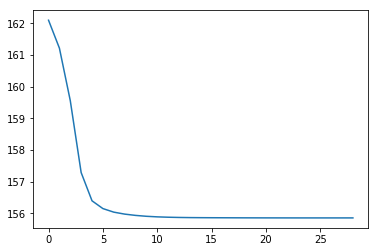

In [27]:
plt.plot(devided_model.score_tracker["perplexity_score"].value[1:])

In [120]:
import datetime

In [121]:
datetime.datetime.now().isoformat()

'2017-12-14T23:03:07.988787'

In [122]:
d = {'col1': ts1, 'col2': ts2}
df = DataFrame(data=d, index=index)

NameError: name 'ts1' is not defined

In [ ]:
def save_model(model):
    file_name = 'model_' + str(T) + str(model.score_tracker["perplexity_score"])
    model.save(file_name)

In [ ]:
ss